Data Reading

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [48]:
df=pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [49]:
df.sample(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
99,100,M,54.0,Central,82.0,Others,Commerce,63.00,Sci&Tech,No,50.0,Mkt&Fin,59.47,Not Placed,NaN
24,25,M,76.5,Others,97.7,Others,Science,78.86,Sci&Tech,No,97.4,Mkt&Fin,74.01,Placed,360000.0
205,206,M,61.0,Others,62.0,Others,Commerce,65.00,Comm&Mgmt,No,62.0,Mkt&Fin,56.81,Placed,250000.0
144,145,M,52.0,Others,50.0,Others,Arts,61.00,Comm&Mgmt,No,60.0,Mkt&Fin,58.52,Not Placed,NaN
213,214,F,74.0,Others,66.0,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [50]:
df=df.loc[:, ['ssc_p', 'salary','etest_p']]

In [51]:
df.head(10)

,ssc_p,salary,etest_p
0,67.00,270000.0,55.00
1,79.33,200000.0,86.50
2,65.00,250000.0,75.00
3,56.00,NaN,66.00
4,85.80,425000.0,96.80
5,55.00,NaN,55.00
6,46.00,NaN,74.28
7,82.00,252000.0,67.00
8,73.00,231000.0,91.34
9,58.00,NaN,54.00


Train Test Split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('etest_p', axis=1),
                                                    df['etest_p'],
                                                    test_size=0.3,
                                                    random_state=0)
df.shape

(215, 3)

Standard Scaler

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
X_train

,ssc_p,salary
111,51.00,NaN
159,52.00,NaN
24,76.50,360000.0
30,64.00,250000.0
60,74.00,260000.0
...,...,...
67,80.92,275000.0
192,65.20,270000.0
117,77.00,240000.0
47,63.00,204000.0


In [55]:
X_test_scaled

array([[ 0.03576821,         nan],
       [ 1.21321465,  0.20888564],
       [ 1.70381734, -0.83183234],
       [-1.828522  ,         nan],
       [ 1.31133519, -0.07494654],
       [-0.74919609,         nan],
       [ 0.91885304,  0.01966419],
       [ 0.03576821, -0.68991625],
       [-1.14167824,         nan],
       [ 1.70381734,  0.01966419],
       [-0.61182734, -0.73722161],
       [ 2.23366824,  0.96577145],
       [ 1.99817895,  0.01966419],
       [-0.84731663, -0.45338944],
       [-0.98468538,  0.3602628 ],
       [-1.07495627, -0.35877871],
       [ 1.21321465, -0.83183234],
       [-1.92664253,         nan],
       [-1.73040146,  0.39810709],
       [ 0.03576821,         nan],
       [-0.65500037,         nan],
       [-0.06235233,         nan],
       [-0.45483448, -0.7750659 ],
       [-0.2585934 ,         nan],
       [-1.43603985,         nan],
       [-0.35671394,         nan],
       [ 2.09629948, -0.43446729],
       [-0.16047287, -0.92644307],
       [-0.45483448,

In [56]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [57]:
np.round(X_train.describe(), 1)

,ssc_p,salary
count,150.0,102.0
mean,66.6,297921.6
std,10.2,106218.2
min,41.0,200000.0
25%,60.4,240000.0
50%,67.0,265000.0
75%,74.0,300000.0
max,87.0,940000.0


In [58]:
np.round(X_train_scaled.describe(), 1)

,ssc_p,salary
count,150.0,102.0
mean,0.0,0.0
std,1.0,1.0
min,-2.5,-0.9
25%,-0.6,-0.5
50%,0.0,-0.3
75%,0.7,0.0
max,2.0,6.1


Effect of Scaling

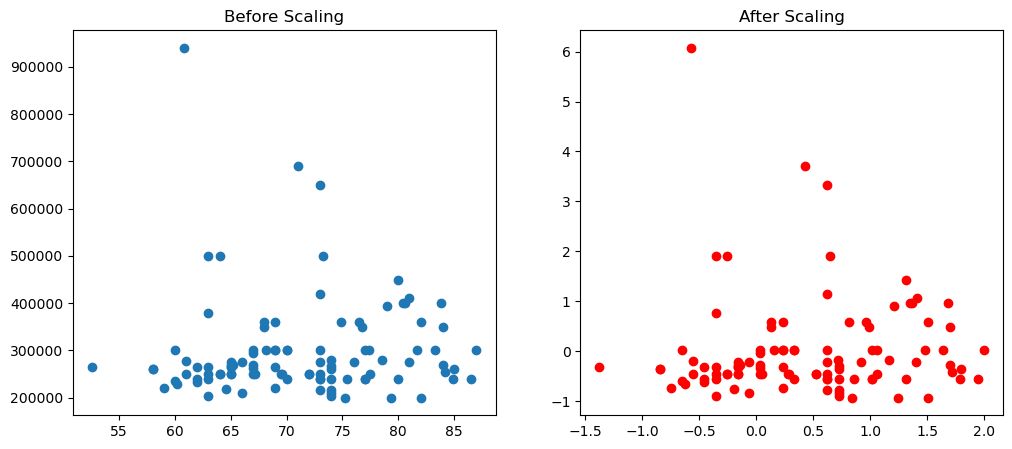

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['ssc_p'], X_train['salary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['ssc_p'], X_train_scaled['salary'],color='red')
ax2.set_title("After Scaling")
plt.show()

c:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

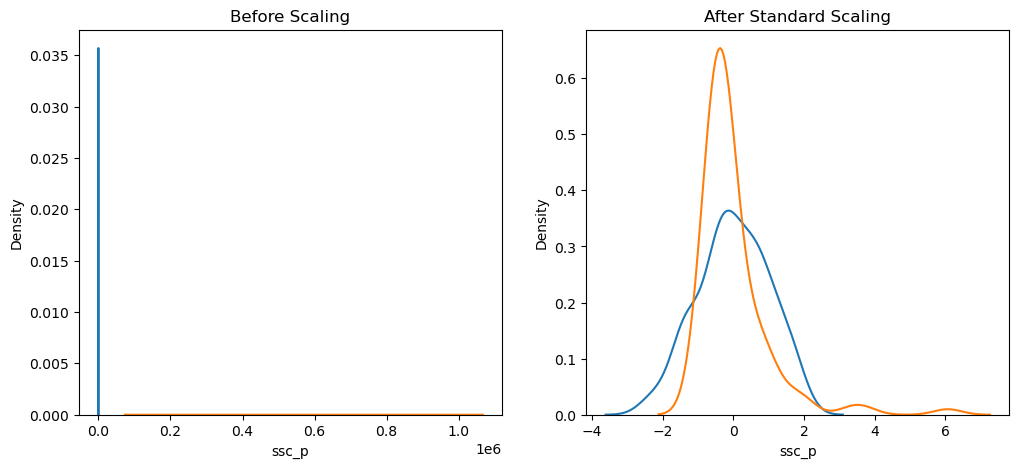

In [62]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['ssc_p'], ax=ax1)
sns.kdeplot(X_train['salary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['ssc_p'], ax=ax2)
sns.kdeplot(X_train_scaled['salary'], ax=ax2)
plt.show()